# Estudos de Caso - Classificação Multi-classe


#### 1 - Importando a base de dados

In [1]:
%matplotlib inline
import pandas as pd

Data -> https://www.kaggle.com/dushyantv/consumer_complaints

In [2]:
df = pd.read_csv('./Data/Consumer_Complaints.csv')
df = df.sample(frac=0.05, random_state=10)
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID,Unnamed: 18
149494,03/14/2016,Payday loan,NaN,Can't contact lender,NaN,I have been receiving harassing threatening ph...,Company believes complaint caused principally ...,"EZCORP, INC.",OH,453XX,NaN,Consent provided,Web,03/14/2016,Closed with explanation,Yes,No,1831941,NaN
467117,01/20/2016,Credit reporting,NaN,Credit monitoring or identity protection,Problem with fraud alerts,NaN,Company chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IN,46341,"Older American, Servicemember",NaN,Phone,01/20/2016,Closed with non-monetary relief,Yes,No,1750672,NaN
743113,09/27/2013,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Statebridge Company,GA,30052,NaN,NaN,Web,09/27/2013,Closed with explanation,Yes,No,545186,NaN
545672,06/13/2014,Student loan,Non-federal student loan,Dealing with my lender or servicer,Need information about my balance/terms,NaN,NaN,AES/PHEAA,GA,30607,NaN,NaN,Web,06/13/2014,Closed with explanation,Yes,Yes,893762,NaN
55857,07-06-2015,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,"EQUIFAX, INC.",NC,28334,NaN,Consent not provided,Web,07-06-2015,Closed with explanation,Yes,No,1453534,NaN


In [3]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer Complaint', 'Company Public Response', 'Company', 'State',
       'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via',
       'Date Sent to Company', 'Company Response to Consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'Unnamed: 18'],
      dtype='object')

#### 2 - Limpando a base de dados

In [4]:
col = ['Product', 'Consumer Complaint']

In [5]:
df = df[col]
df.head()

,Product,Consumer Complaint
149494,Payday loan,I have been receiving harassing threatening ph...
467117,Credit reporting,NaN
743113,Mortgage,NaN
545672,Student loan,NaN
55857,Credit reporting,NaN


In [6]:
df = df[pd.notnull(df['Consumer Complaint'])]
df.head()

,Product,Consumer Complaint
149494,Payday loan,I have been receiving harassing threatening ph...
88109,"Credit reporting, credit repair services, or o...",Please remove the following fraudulent inquiri...
669383,Credit reporting,I have disputed several reports on my Transuni...
448379,Debt collection,"In 2007, I only registered spring semaster @ X..."
901620,Vehicle loan or lease,Since XX/XX/XXXX I have been paying my vehicle...


In [8]:
df.columns = ['Product', 'Consumer_complaint']

In [9]:
df['category_id'] = df['Product'].factorize()[0]

In [11]:
# df.head()
df['category_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [15]:
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_id_df.head()

,Product,category_id
149494,Payday loan,0
88109,"Credit reporting, credit repair services, or o...",1
669383,Credit reporting,2
448379,Debt collection,3
901620,Vehicle loan or lease,4


In [16]:
category_to_id = dict(category_id_df.values)

In [17]:
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
id_to_category

{0: 'Payday loan',
 1: 'Credit reporting, credit repair services, or other personal consumer reports',
 2: 'Credit reporting',
 3: 'Debt collection',
 4: 'Vehicle loan or lease',
 5: 'Bank account or service',
 6: 'Mortgage',
 7: 'Consumer Loan',
 8: 'Credit card',
 9: 'Payday loan, title loan, or personal loan',
 10: 'Student loan',
 11: 'Prepaid card',
 12: 'Credit card or prepaid card',
 13: 'Checking or savings account',
 14: 'Other financial service',
 15: 'Money transfer, virtual currency, or money service',
 16: 'Money transfers',
 17: 'Virtual currency'}

#### 3 - Plotando as variáveis categóricas

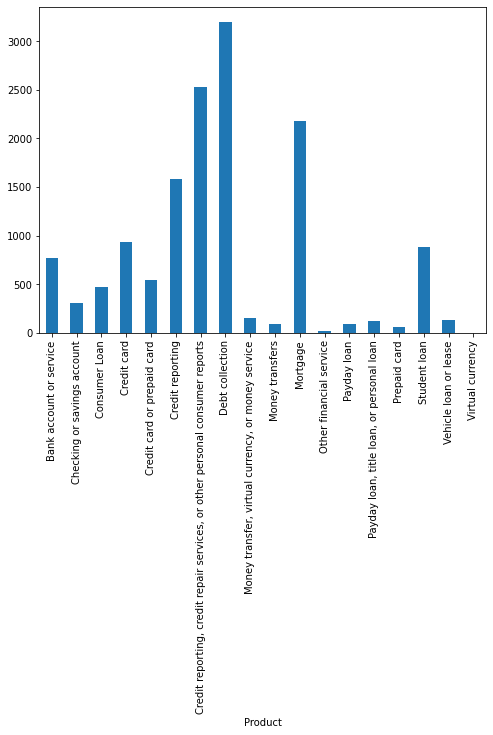

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))

df.groupby('Product').Consumer_complaint.count().plot.bar(ylim=0)
plt.xticks(rotation=90)
plt.show()

#### 4 - Mala de palavras

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, 
                        min_df=5, 
                        norm='l2', 
                        encoding='latin-1', 
                        ngram_range=(1, 2), 
                        stop_words='english')

In [21]:
features = tfidf.fit_transform(df.Consumer_complaint).toarray()
features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02478791, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07847375, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [22]:
labels = df.category_id
labels

149494     0
88109      1
669383     2
448379     3
901620     4
          ..
457991     5
894307    12
922520     6
32298      5
150735    10
Name: category_id, Length: 14042, dtype: int64

#### 5 - Chi2 para encontrar termos mais relacionados a cada categoria

In [24]:
category_to_id

{'Payday loan': 0,
 'Credit reporting, credit repair services, or other personal consumer reports': 1,
 'Credit reporting': 2,
 'Debt collection': 3,
 'Vehicle loan or lease': 4,
 'Bank account or service': 5,
 'Mortgage': 6,
 'Consumer Loan': 7,
 'Credit card': 8,
 'Payday loan, title loan, or personal loan': 9,
 'Student loan': 10,
 'Prepaid card': 11,
 'Credit card or prepaid card': 12,
 'Checking or savings account': 13,
 'Other financial service': 14,
 'Money transfer, virtual currency, or money service': 15,
 'Money transfers': 16,
 'Virtual currency': 17}

In [25]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {} \n".format('\n. '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
. bank
. overdraft
  . Most correlated bigrams:
. overdraft fees
. checking account 

# 'Checking or savings account':
  . Most correlated unigrams:
. deposited
. deposit
  . Most correlated bigrams:
. account overdrawn
. checking account 

# 'Consumer Loan':
  . Most correlated unigrams:
. vehicle
. car
  . Most correlated bigrams:
. auto loan
. consumer usa 

# 'Credit card':
  . Most correlated unigrams:
. citi
. card
  . Most correlated bigrams:
. american express
. credit card 

# 'Credit card or prepaid card':
  . Most correlated unigrams:
. merchant
. card
  . Most correlated bigrams:
. american express
. credit card 

# 'Credit reporting':
  . Most correlated unigrams:
. equifax
. experian
  . Most correlated bigrams:
. trans union
. credit report 

# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
. inquiries
. equifax
  . Most correlated bigrams:
. mistakes

#### 6 - Treinando o classificador Naive-Bayes Multinomial

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint'], 
                                                    df['Product'], random_state = 0)

In [34]:
count_vect = CountVectorizer()

In [35]:
X_train_counts = count_vect.fit_transform(X_train)

In [36]:
tfidf_transformer = TfidfTransformer()

In [37]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [38]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

#### 7 - Fazendo previsões

In [39]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification \
                                        and validation of debt per my right under the FDCPA. \
                                        I do not believe this debt is mine."])))

['Debt collection']


In [40]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems \
                                        has on my credit report. I initially submitted a police report \
                                        on XXXX/XXXX/16 and Chex Systems only deleted the items that I \
                                        mentioned in the letter and not all the items that were actually \
                                        listed on the police report. In other words they wanted me to say \
                                        word for word to them what items were fraudulent. The total disregard \
                                        of the police report and what accounts that it states that are fraudulent. \
                                        If they just had paid a little closer attention to the police report I \
                                        would not been in this position now and they would n't have to research \
                                        once again. I would like the reported information to be removed : \
                                        XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


#### 8 - Selecionando o melhor classificador

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0, solver='liblinear'),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.head(100)

/Users/marinaramalhetedesouza/opt/anaconda3/envs/ml-impa/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/marinaramalhetedesouza/opt/anaconda3/envs/ml-impa/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/marinaramalhetedesouza/opt/anaconda3/envs/ml-impa/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/marinaramalhetedesouza/opt/anaconda3/envs/ml-impa/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.294767
1,RandomForestClassifier,1,0.288359
2,RandomForestClassifier,2,0.289530
3,RandomForestClassifier,3,0.289174
4,RandomForestClassifier,4,0.293091
5,LinearSVC,0,0.696333
6,LinearSVC,1,0.692417
7,LinearSVC,2,0.684473
8,LinearSVC,3,0.713319
9,LinearSVC,4,0.698362


## 9 - Plotando os resultados do processo de seleção

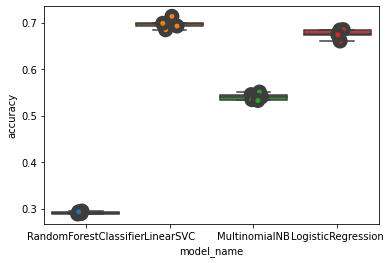

In [45]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=5)
plt.show()

#### 10 - Matriz de confusão SVC linear

In [79]:
model_svc = LinearSVC()

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=0)

model_svc.fit(X_train, y_train)

y_pred = model_svc.predict(X_test)

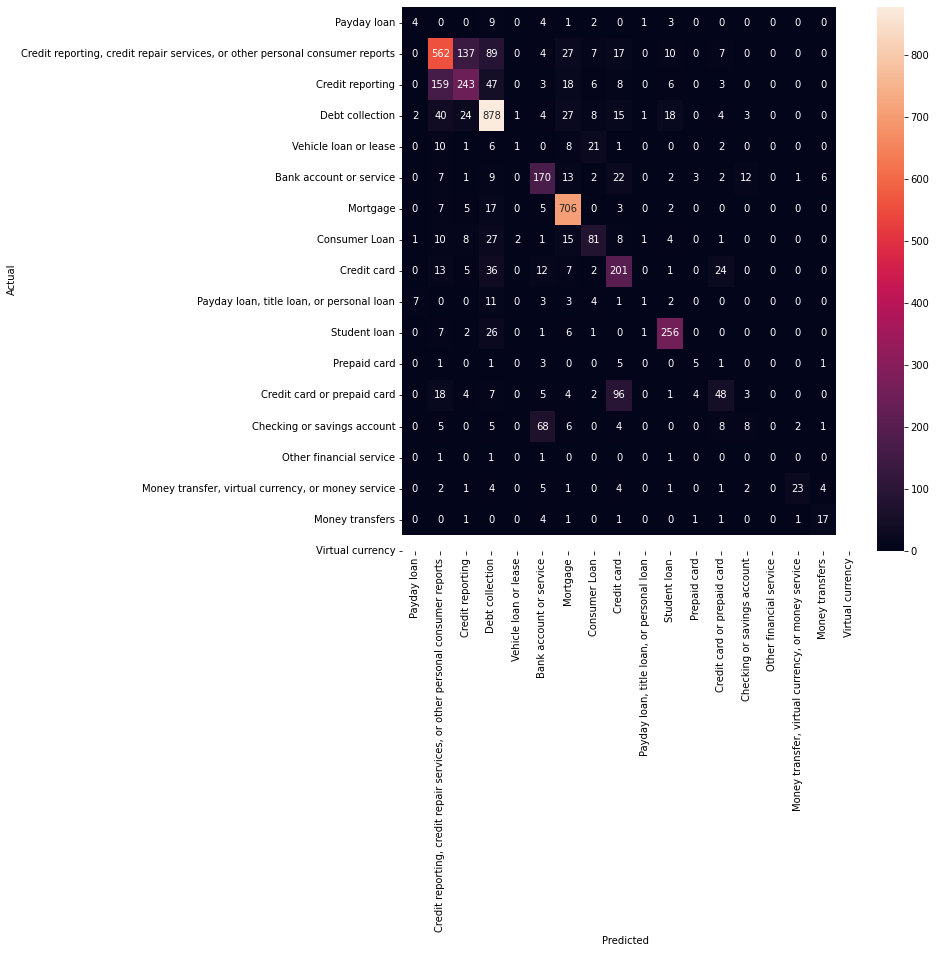

In [72]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, 
            yticklabels=category_id_df.Product.values)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### 11 - Verificação de causa de classificações incorretas

In [50]:
# from IPython.display import display

# for predicted in category_id_df.category_id:
#     for actual in category_id_df.category_id:
#         if predicted != actual and conf_mat[actual, predicted] >= 10:
#             print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], 
#                                                                  id_to_category[predicted], 
#                                                                  conf_mat[actual, predicted]))
            
#             display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 
#                                                                                       'Consumer_complaint']])
#             print('')

#### 12 - Chi2 para encontrar termos mais correlacionados com cada categoria

In [51]:
model_svc.fit(features, labels)

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {} \n".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . bank
       . scottrade
  . Top bigrams:
       . debit card
       . xxxx 15 

# 'Checking or savings account':
  . Top unigrams:
       . bank
       . didn
  . Top bigrams:
       . 00 deposited
       . just got 

# 'Consumer Loan':
  . Top unigrams:
       . car
       . loan
  . Top bigrams:
       . auto loan
       . xxxx payments 

# 'Credit card':
  . Top unigrams:
       . card
       . citi
  . Top bigrams:
       . credit card
       . balance transfer 

# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . merchant
  . Top bigrams:
       . close account
       . card ending 

# 'Credit reporting':
  . Top unigrams:
       . equifax
       . experian
  . Top bigrams:
       . unauthorized fraudulent
       . trans union 

# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . breach
       . freeze
  . Top bigrams:
       . xxxx xxxx
       . x

#### 13 - Reporte de classificação

In [84]:
# from sklearn import metrics
# print(metrics.classification_report(y_test, y_pred, target_names=df['Product'].unique()))

#### 14 - Métricas do modelo escolhido -> LinearSVC

In [83]:
CV = 5
cv_df = pd.DataFrame(index=range(CV))

entries = []
model_name = model_svc.__class__.__name__
accuracies = cross_val_score(model_svc, features, labels, scoring='accuracy', cv=CV)
for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.head()

/Users/marinaramalhetedesouza/opt/anaconda3/envs/ml-impa/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,model_name,fold_idx,accuracy
0,LinearSVC,0,0.696333
1,LinearSVC,1,0.692417
2,LinearSVC,2,0.684473
3,LinearSVC,3,0.713319
4,LinearSVC,4,0.698362
